## Ejercicios Seaborn

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==2.2.1
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2


### Ejercicio 0:
- Lee el archivo **`pokemon.csv`** y guardalo en la variable **`df`**.

In [3]:
df = pd.read_csv('../Data/Pokemon.csv')
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

### Ejercicio 1:
- Haz un diagrama de barras con el número de pokémons en cada generación.

<Axes: xlabel='Generation', ylabel='count'>

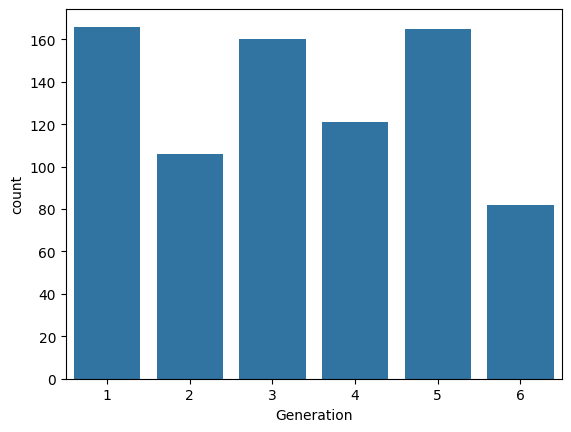

In [4]:
# countplot
sns.countplot(df, x='Generation')

### Ejercicio 2:
- Representar la frecuencia de pokémons por tipo 1 en un gráfico de barras.

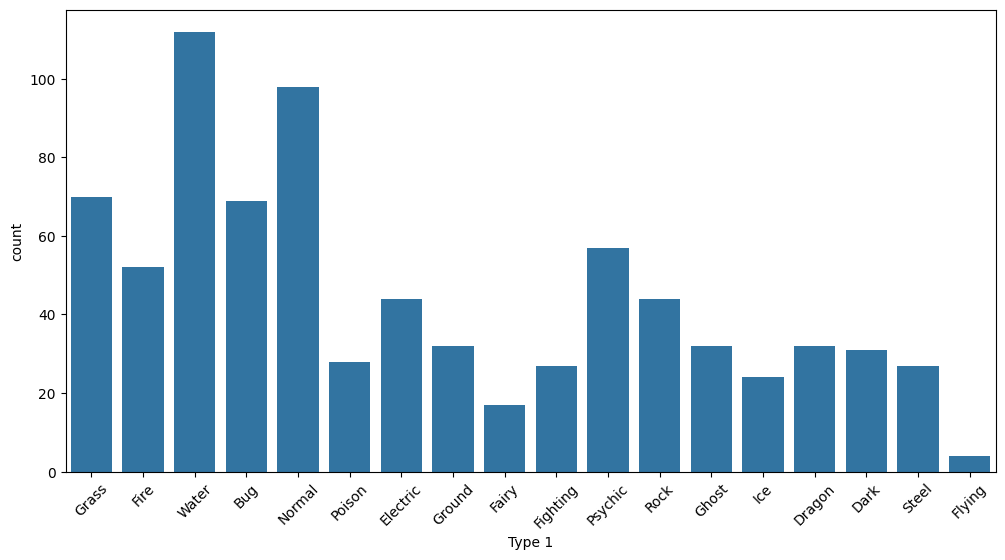

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Type 1')
plt.xticks(rotation=45);

In [12]:
# con orden DESCENDENTE
sorted_types_desc = df['Type 1'].value_counts().index
sorted_types_desc

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock',
       'Electric', 'Ground', 'Ghost', 'Dragon', 'Dark', 'Poison', 'Fighting',
       'Steel', 'Ice', 'Fairy', 'Flying'],
      dtype='object', name='Type 1')

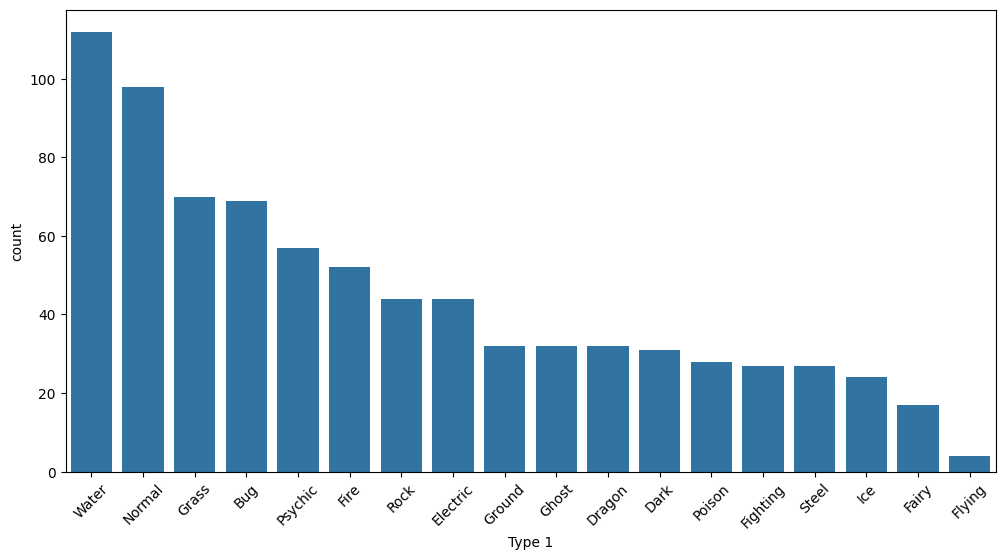

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Type 1', order=sorted_types_desc)
plt.xticks(rotation=45);

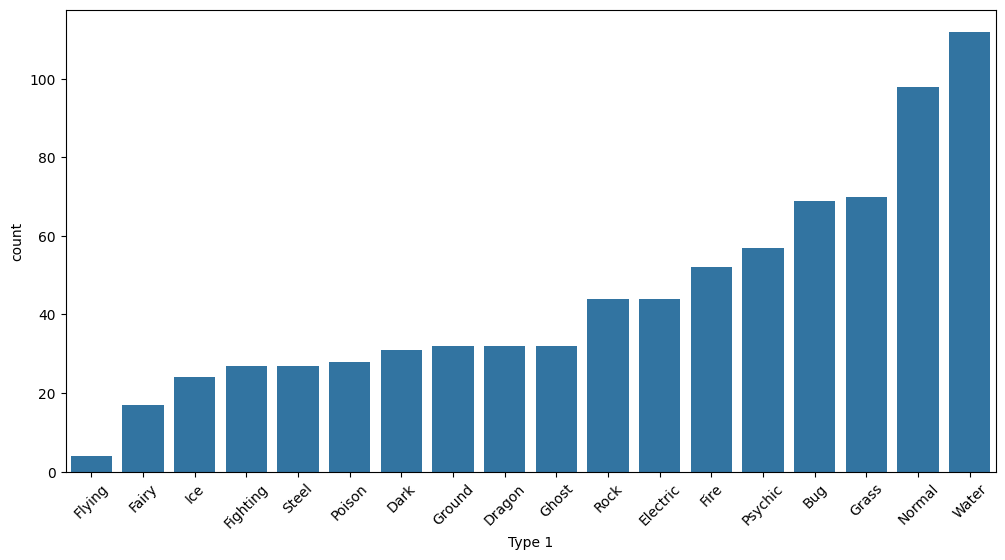

In [14]:
# con orden ASCENDENTE
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Type 1', order=df['Type 1'].value_counts(ascending=True).index)
plt.xticks(rotation=45);

### Ejercicio 3:
- Haz un diagrama de barras con el número de pokémons tipo 1 igual a "Grass" y "Fire".

In [17]:
filtro = df['Type 1'].isin(['Grass', 'Fire'])
df[filtro].shape # 122 pokemons en total entre Grass Fire

(122, 13)

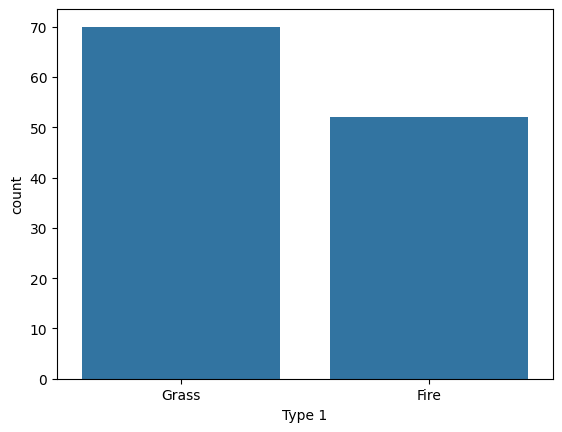

In [19]:
sns.countplot(x = df[filtro]['Type 1']);

### Ejercicio 4:
- Haz un histograma con los puntos de salud HP de los pokémons, utiliza el color verde.
- Dibuja una línea vertical magenta que represente el promedio.

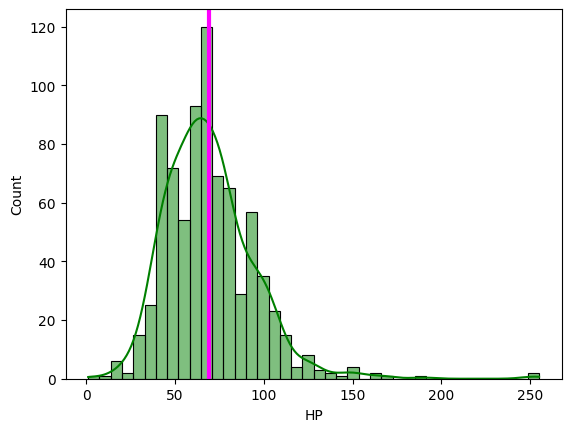

In [28]:
sns.histplot(df, x='HP', color='green', kde=True)
plt.axvline(df['HP'].mean(), color='magenta', linewidth=3);

### Ejercicio 5:
-  Haz un histograma con la frecuencia de pokémons por rapidez (Speed).
-  Dibuja una línea vertical magenta que corresponda con la mediana.
-  Dibuja unas líneas verticales discontinuas de color magenta que correspondan con los cuartiles Q1 y Q3.

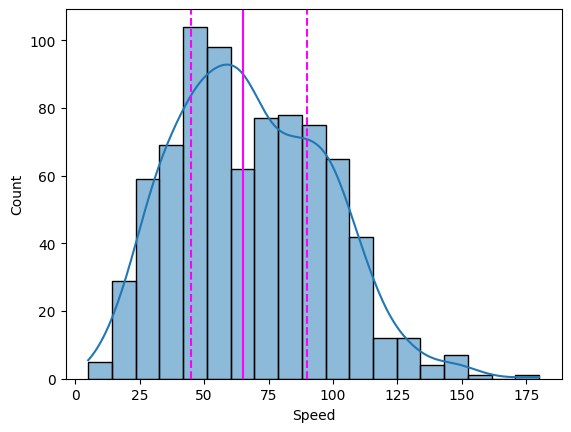

In [36]:
sns.histplot(df, x='Speed', kde=True)
plt.axvline(df['Speed'].median(), color='magenta')
plt.axvline(df['Speed'].quantile(0.25), color='magenta', linestyle='--') # Q1
plt.axvline(df['Speed'].quantile(0.75), color='magenta', linestyle='--'); # Q3

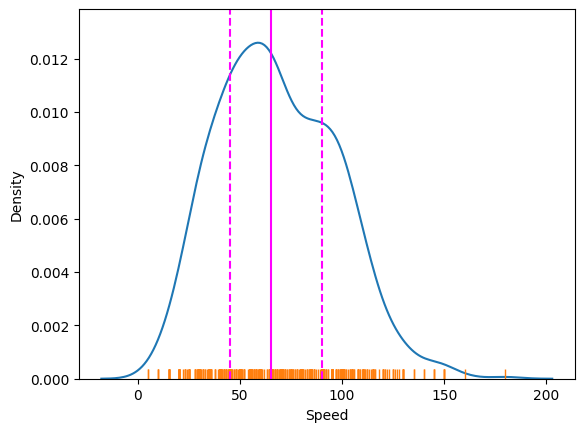

In [77]:
sns.kdeplot(df, x='Speed')
sns.rugplot(df, x='Speed')
plt.axvline(df['Speed'].median(), color='magenta')
plt.axvline(df['Speed'].quantile(0.25), color='magenta', linestyle='--') # Q1
plt.axvline(df['Speed'].quantile(0.75), color='magenta', linestyle='--'); # Q3

### Ejercicio 6:
- Haz un histograma con los puntos de salud (HP) de los pokémons (Type 1) = "Fire".

<Axes: xlabel='HP', ylabel='Count'>

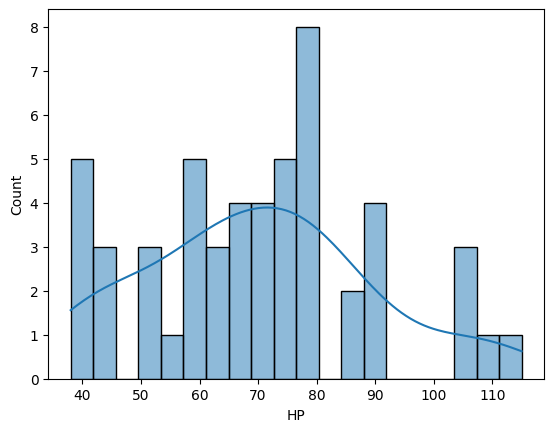

In [54]:
filtro = df['Type 1'] == 'Fire'
sns.histplot(x=df[filtro]['HP'], bins=20, kde=True)

### Ejercicio 7:
- Haz un scatter plot y un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons.

<Axes: xlabel='Attack', ylabel='Defense'>

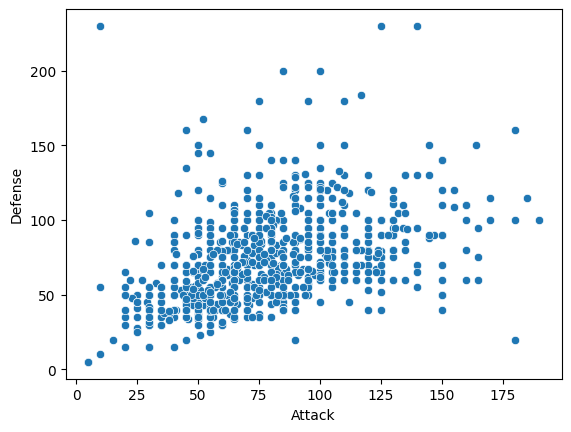

In [41]:
sns.scatterplot(df, x='Attack', y='Defense')

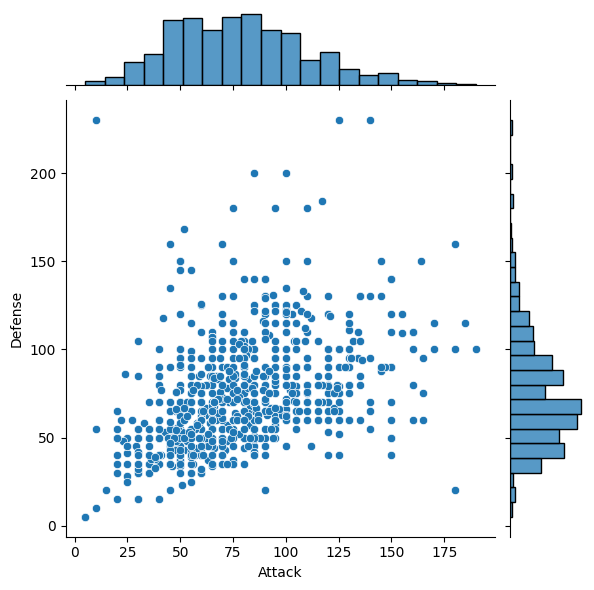

In [46]:
sns.jointplot(df, x='Attack', y='Defense')

In [48]:
df.describe(include='all')

#                 Name Type 1  Type 2      Total          HP  \
count   800.000000                  800    800     414  800.00000  800.000000   
unique         NaN                  800     18      18        NaN         NaN   
top            NaN  PumpkabooSuper Size  Water  Flying        NaN         NaN   
freq           NaN                    1    112      97        NaN         NaN   
mean    362.813750                  NaN    NaN     NaN  435.10250   69.258750   
std     208.343798                  NaN    NaN     NaN  119.96304   25.534669   
min       1.000000                  NaN    NaN     NaN  180.00000    1.000000   
25%     184.750000                  NaN    NaN     NaN  330.00000   50.000000   
50%     364.500000                  NaN    NaN     NaN  450.00000   65.000000   
75%     539.250000                  NaN    NaN     NaN  515.00000   80.000000   
max     721.000000                  NaN    NaN     NaN  780.00000  255.000000   

            Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count   800.000000  800.000000  800.000000  800.000000  800.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     79.001250   73.842500   72.820000   71.902500   68.277500   
std      32.457366   31.183501   32.722294   27.828916   29.060474   
min       5.000000    5.000000   10.000000   20.000000    5.000000   
25%      55.000000   50.000000   49.750000   50.000000   45.000000   
50%      75.000000   70.000000   65.000000   70.000000   65.000000   
75%     100.000000   90.000000   95.000000   90.000000   90.000000   
max     190.000000  230.000000  194.000000  230.000000  180.000000   

        Generation Legendary  
count    800.00000       800  
unique         NaN         2  
top            NaN     False  
freq           NaN       735  
mean       3.32375       NaN  
std        1.66129       NaN  
min        1.00000       NaN  
25%        2.00000       NaN  
50%        3.00000       NaN  
75%        5.00000       NaN  
max        6.00000       NaN

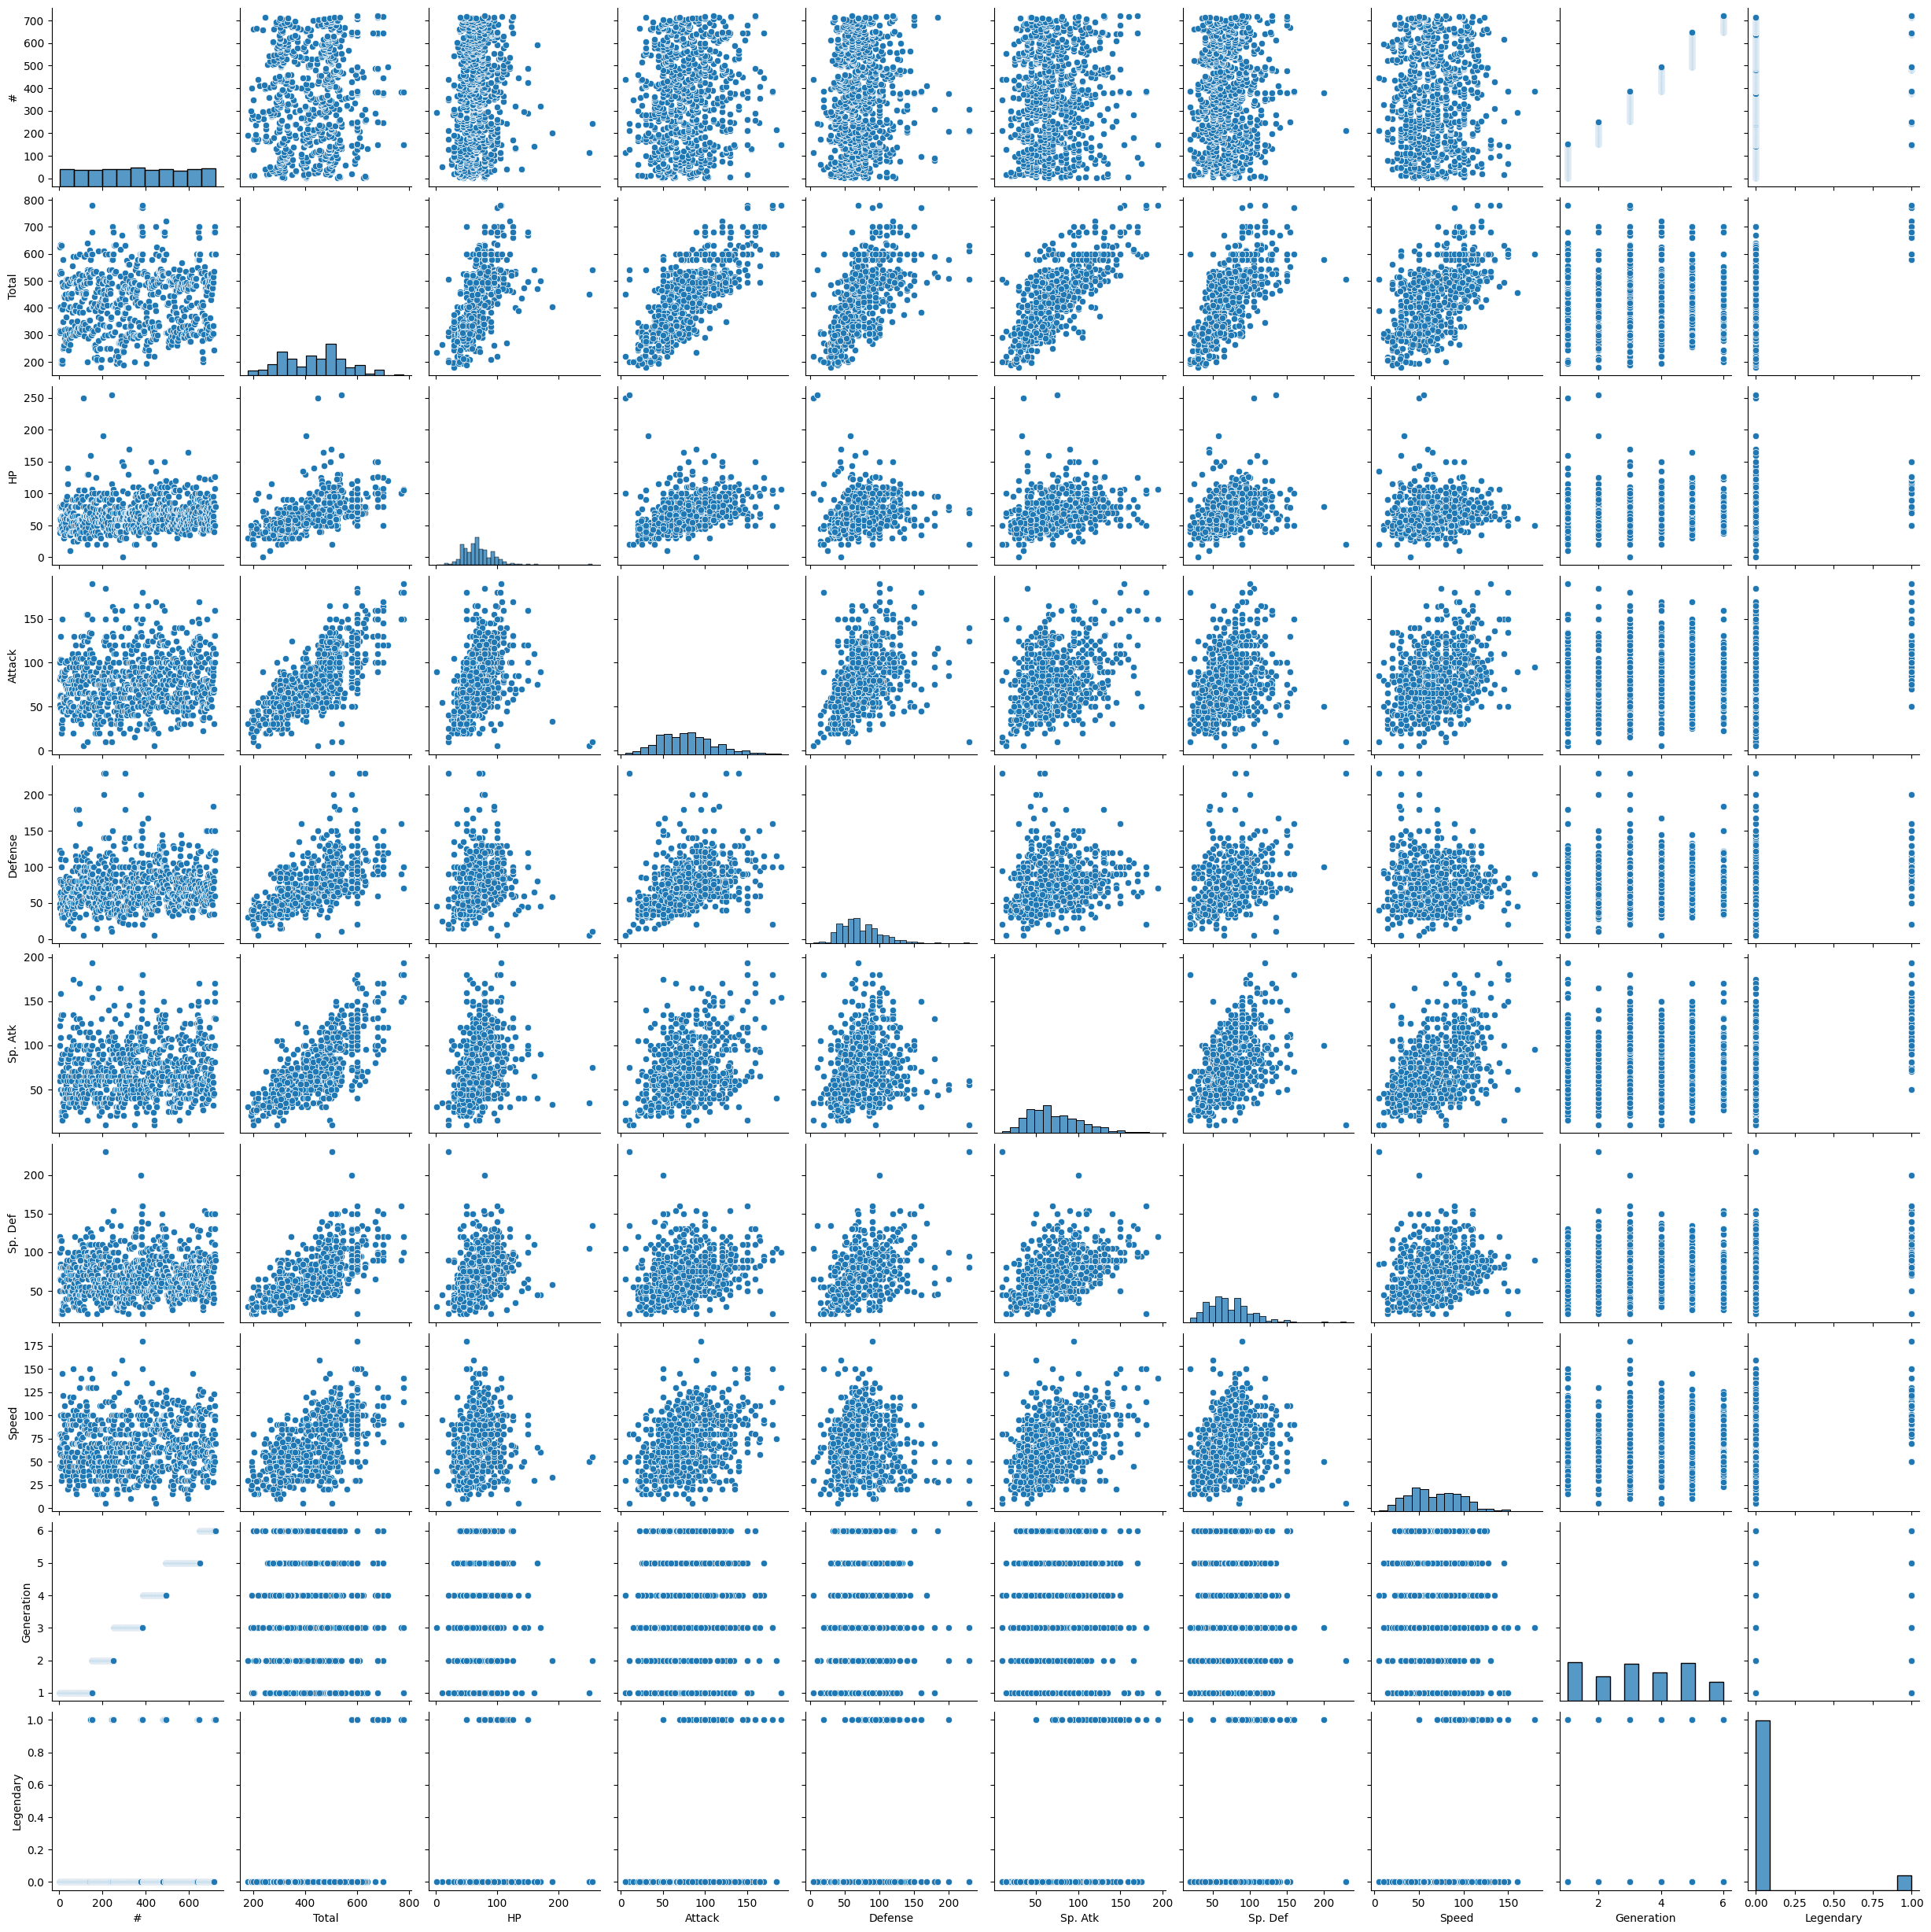

In [ ]:
# alternativa para mostrar todos los scatterplot de todas las combinaciones dos a dos:
# CUIDADO: computacionalmente costoso, mejor usar .sample() si hay muchas filas
# Una idea es hacer primero el pairplot y luego ya enfocarse en aquellas combinaciones que sean interesantes para hacer los scatterplot
sns.pairplot(df)

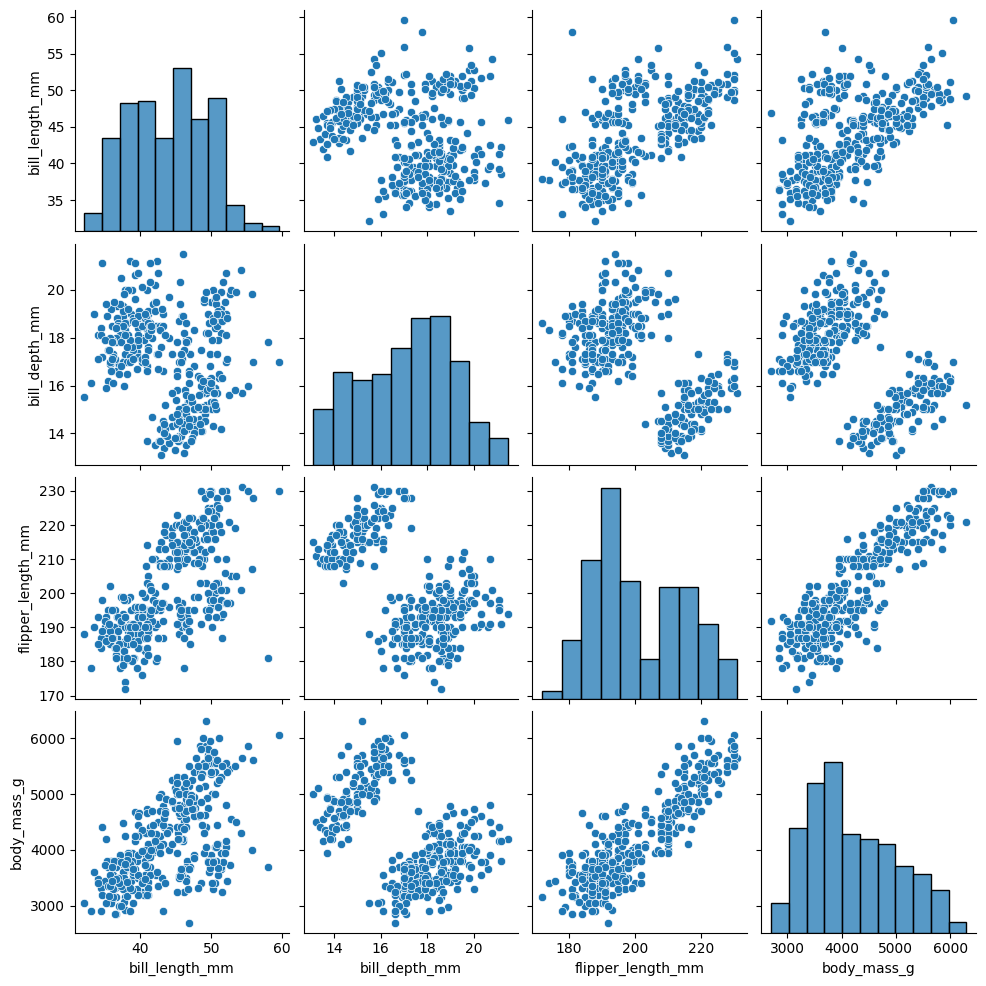

In [57]:
sns.pairplot(sns.load_dataset('penguins'))

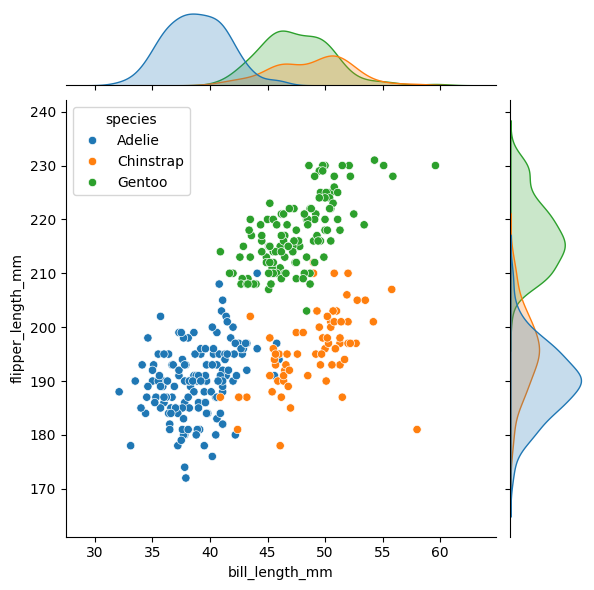

In [63]:
df_penguins = sns.load_dataset('penguins')
sns.jointplot(df_penguins, x='bill_length_mm', y='flipper_length_mm', hue='species')

Axes(0.110463,0.0971296;0.716331x0.727378)


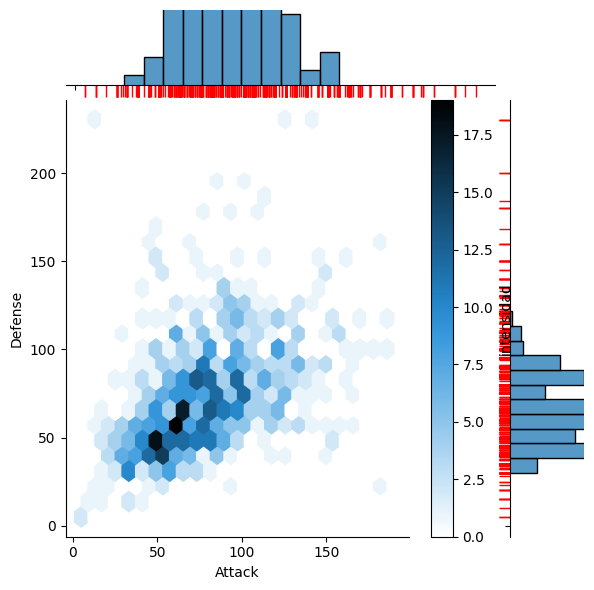

In [91]:
fig = sns.jointplot(df, x='Attack', y='Defense', kind='hex')
print(fig.ax_joint.collections[0])
print(fig.ax_joint)
plt.colorbar(fig.ax_joint.collections[0], ax=fig.ax_joint, label='intensidad')
fig.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

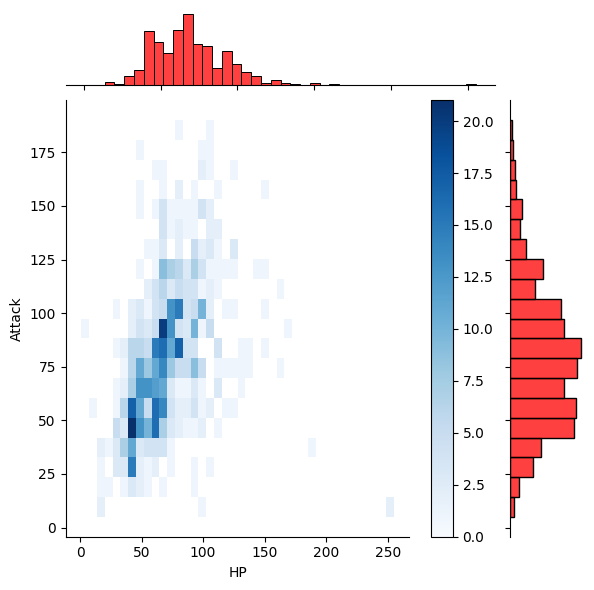

In [94]:
sns.jointplot(data=df, x='HP', y='Attack', color='red', cmap='Blues', kind='hist', cbar=True)

### Ejercicio 8:
- Haz un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons tipo "Water" y "Fire".

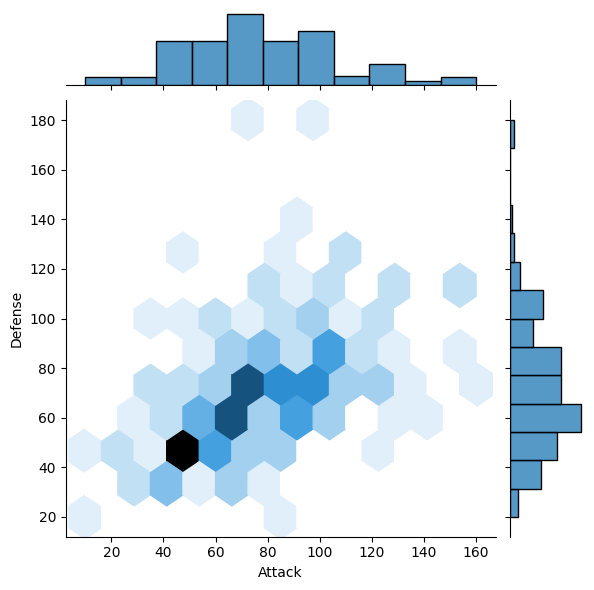

In [78]:
filtro = df['Type 1'].isin(['Water', 'Fire'])
sns.jointplot(df[filtro], x='Attack', y='Defense', kind='hex')

### Ejercicio 9:
- Haz un KDE plot con la salud y el ataque de los pokémons.

<Axes: xlabel='HP', ylabel='Attack'>

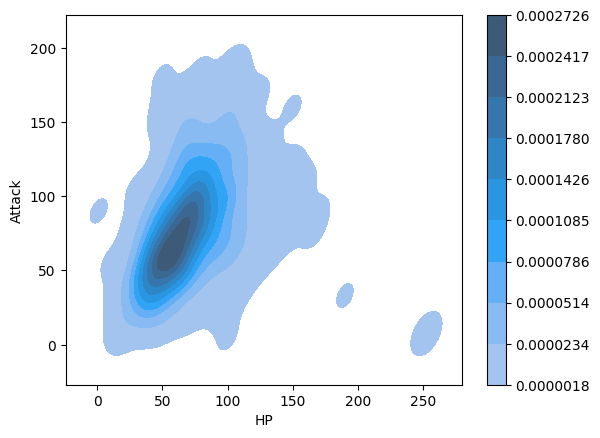

In [88]:
# HP
# Attack
# sns.kdeplot(df)
# thresh controla el umbral de densidad a mostrar en el dibujo, 
# thresh más bajo muestra todas las zonas aunque haya pocos datos, thresh más alto solamente muestra las zonas de mayor densidad de puntos
sns.kdeplot(df, x='HP', y='Attack', fill=True, thresh=0.01, cbar=True)

### Ejercicio 10:
- Haz una grafica de caja con el ataque de los pokémons legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Attack'>

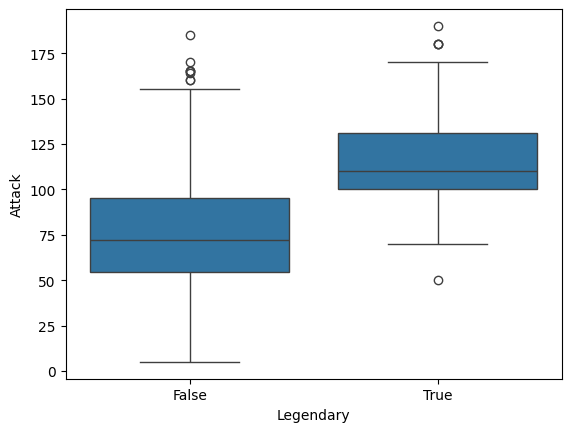

In [95]:
# Legendary
# Attack
sns.boxplot(x=df['Legendary'] , y=df['Attack'])

<Axes: xlabel='Attack'>

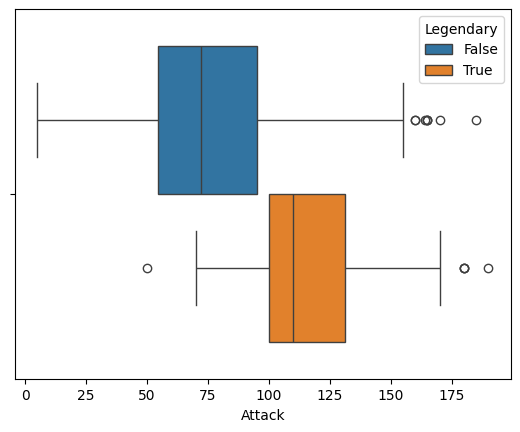

In [97]:
sns.boxplot(x=df['Attack'] , hue=df['Legendary'])

<Axes: xlabel='Attack'>

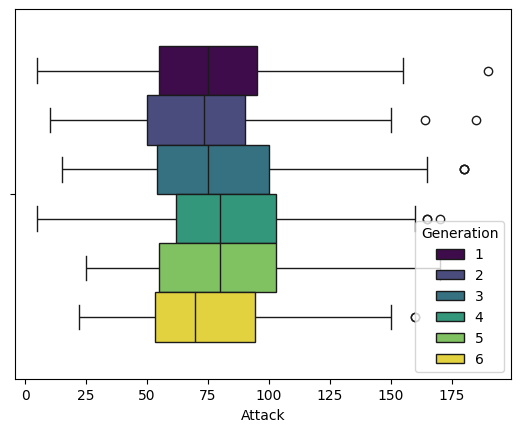

In [99]:
sns.boxplot(x=df['Attack'] , hue=df['Generation'], palette='viridis')

<Axes: xlabel='Attack'>

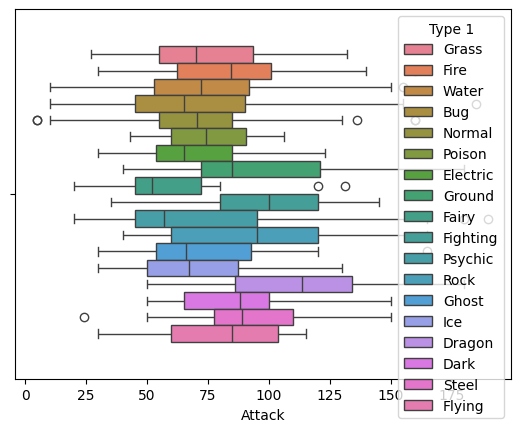

In [103]:
# sns.boxplot(x=df['Attack'] , hue=df['Type 1'], palette='Set2')
sns.boxplot(x=df['Attack'] , hue=df['Type 1'], palette='husl')

<Axes: xlabel='Attack'>

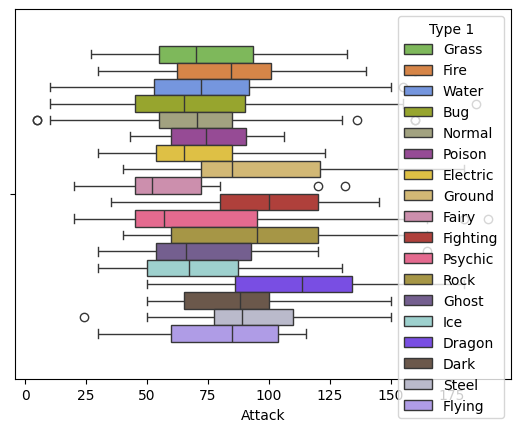

In [105]:
# Cambiar la paleta de colores por una paleta personalizada en función de las categorías
custom_palette = {
 "Normal": "#A8A77A",
    "Fire": "#EE8130",
    "Water": "#6390F0",
    "Electric": "#F7D02C",
    "Grass": "#7AC74C",
    "Ice": "#96D9D6",
    "Fighting": "#C22E28",
    "Poison": "#A33EA1",
    "Ground": "#E2BF65",
    "Flying": "#A98FF3",
    "Psychic": "#F95587",
    "Bug": "#A6B91A",
    "Rock": "#B6A136",
    "Ghost": "#735797",
    "Dragon": "#6F35FC",
    "Dark": "#705746",
    "Steel": "#B7B7CE",
    "Fairy": "#D685AD"
}
sns.boxplot(x=df['Attack'] , hue=df['Type 1'], palette=custom_palette)

### Ejercicio 11:
- Haz una grafica de violin con el ataque de los pokémons legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Attack'>

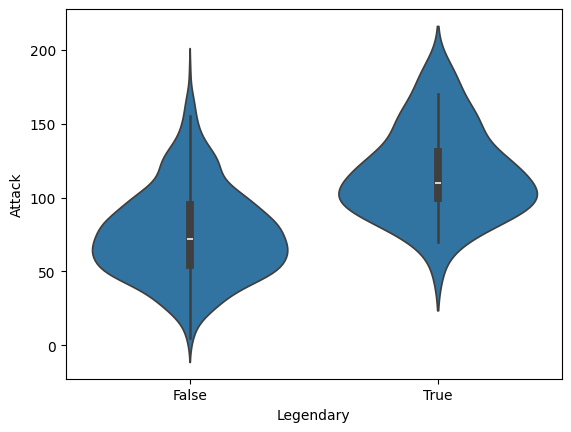

In [106]:
sns.violinplot(x= df['Legendary'], y=df['Attack'])

c:\dev\mod3-data-science\.mod3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Legendary', ylabel='Attack'>

c:\dev\mod3-data-science\.mod3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


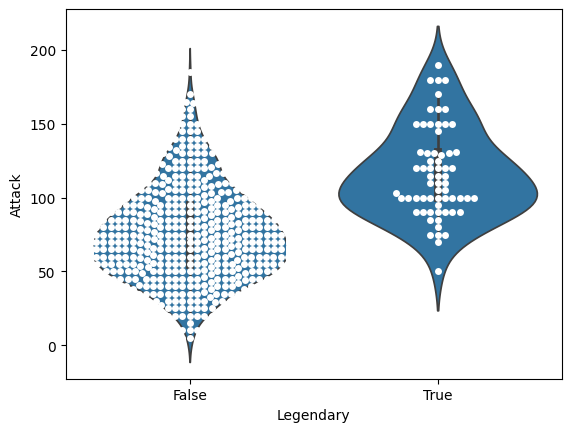

In [108]:
sns.violinplot(x= df['Legendary'], y=df['Attack'])
sns.swarmplot(x= df['Legendary'], y=df['Attack'], color='white')

### Ejercicio 12:
- Haz un pairplot y compara los puntos de salud (HP), el ataque y la defensa de los pokémons.

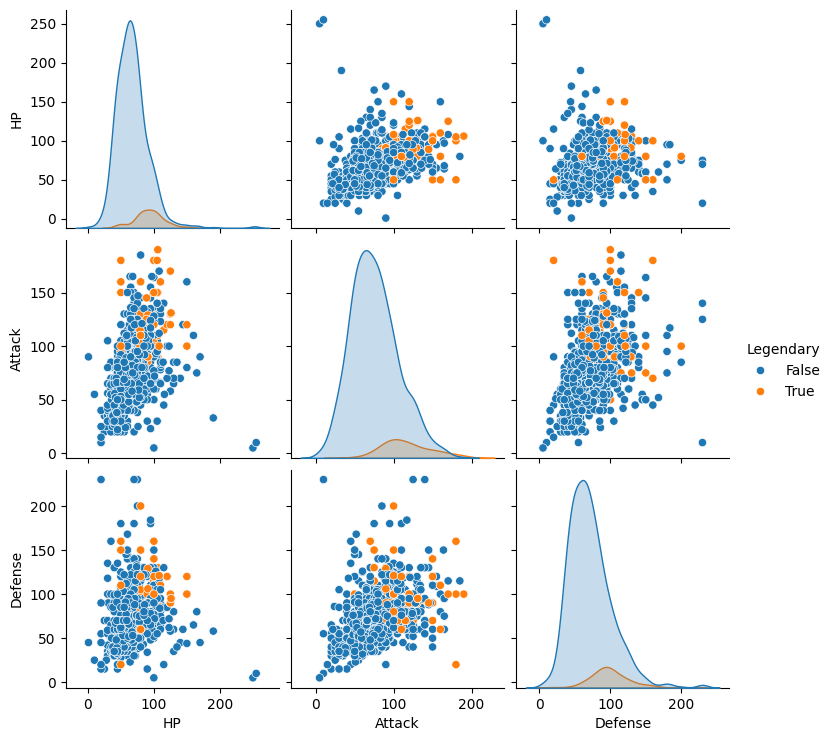

In [111]:
# sns.pairplot(df)
sns.pairplot(df, vars=['HP', 'Attack', 'Defense'], hue='Legendary')

### Ejercicio 13:
- Haz boxplots de la variable 'Total' distinguiendo por generación y entre legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Total'>

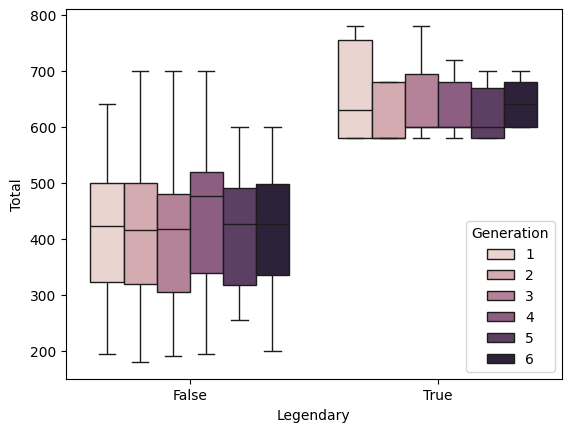

In [112]:
sns.boxplot(x=df['Legendary'], y=df['Total'], hue=df['Generation'])

<Axes: xlabel='Generation', ylabel='Total'>

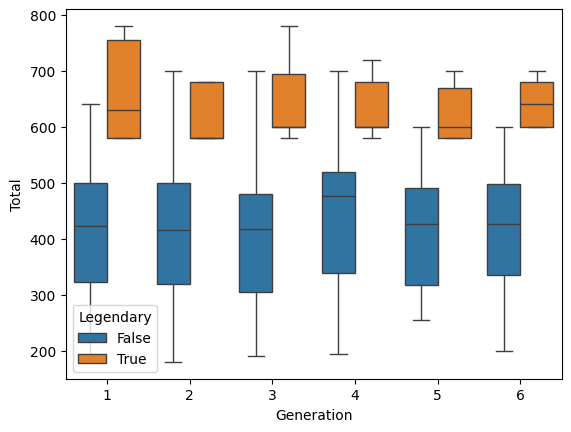

In [113]:
sns.boxplot(x=df['Generation'], y=df['Total'], hue=df['Legendary'] )

### Ejercicio 14:
- Haz un heatmap para comparar la correlación entre salud, ataque, ataque especial, defensa, defensa especial y velocidad.

In [115]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

<Axes: >

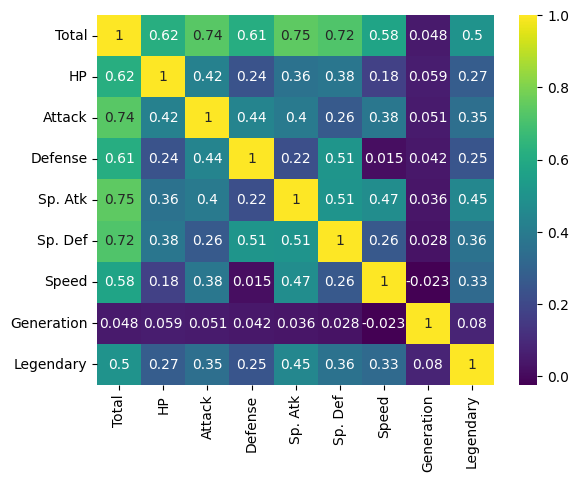

In [ ]:
# Vemos que la columna generación no aporta correlación con nada, se podría eliminar
df_corr = df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
sns.heatmap(df_corr, annot=True, cmap ='viridis')

<Axes: >

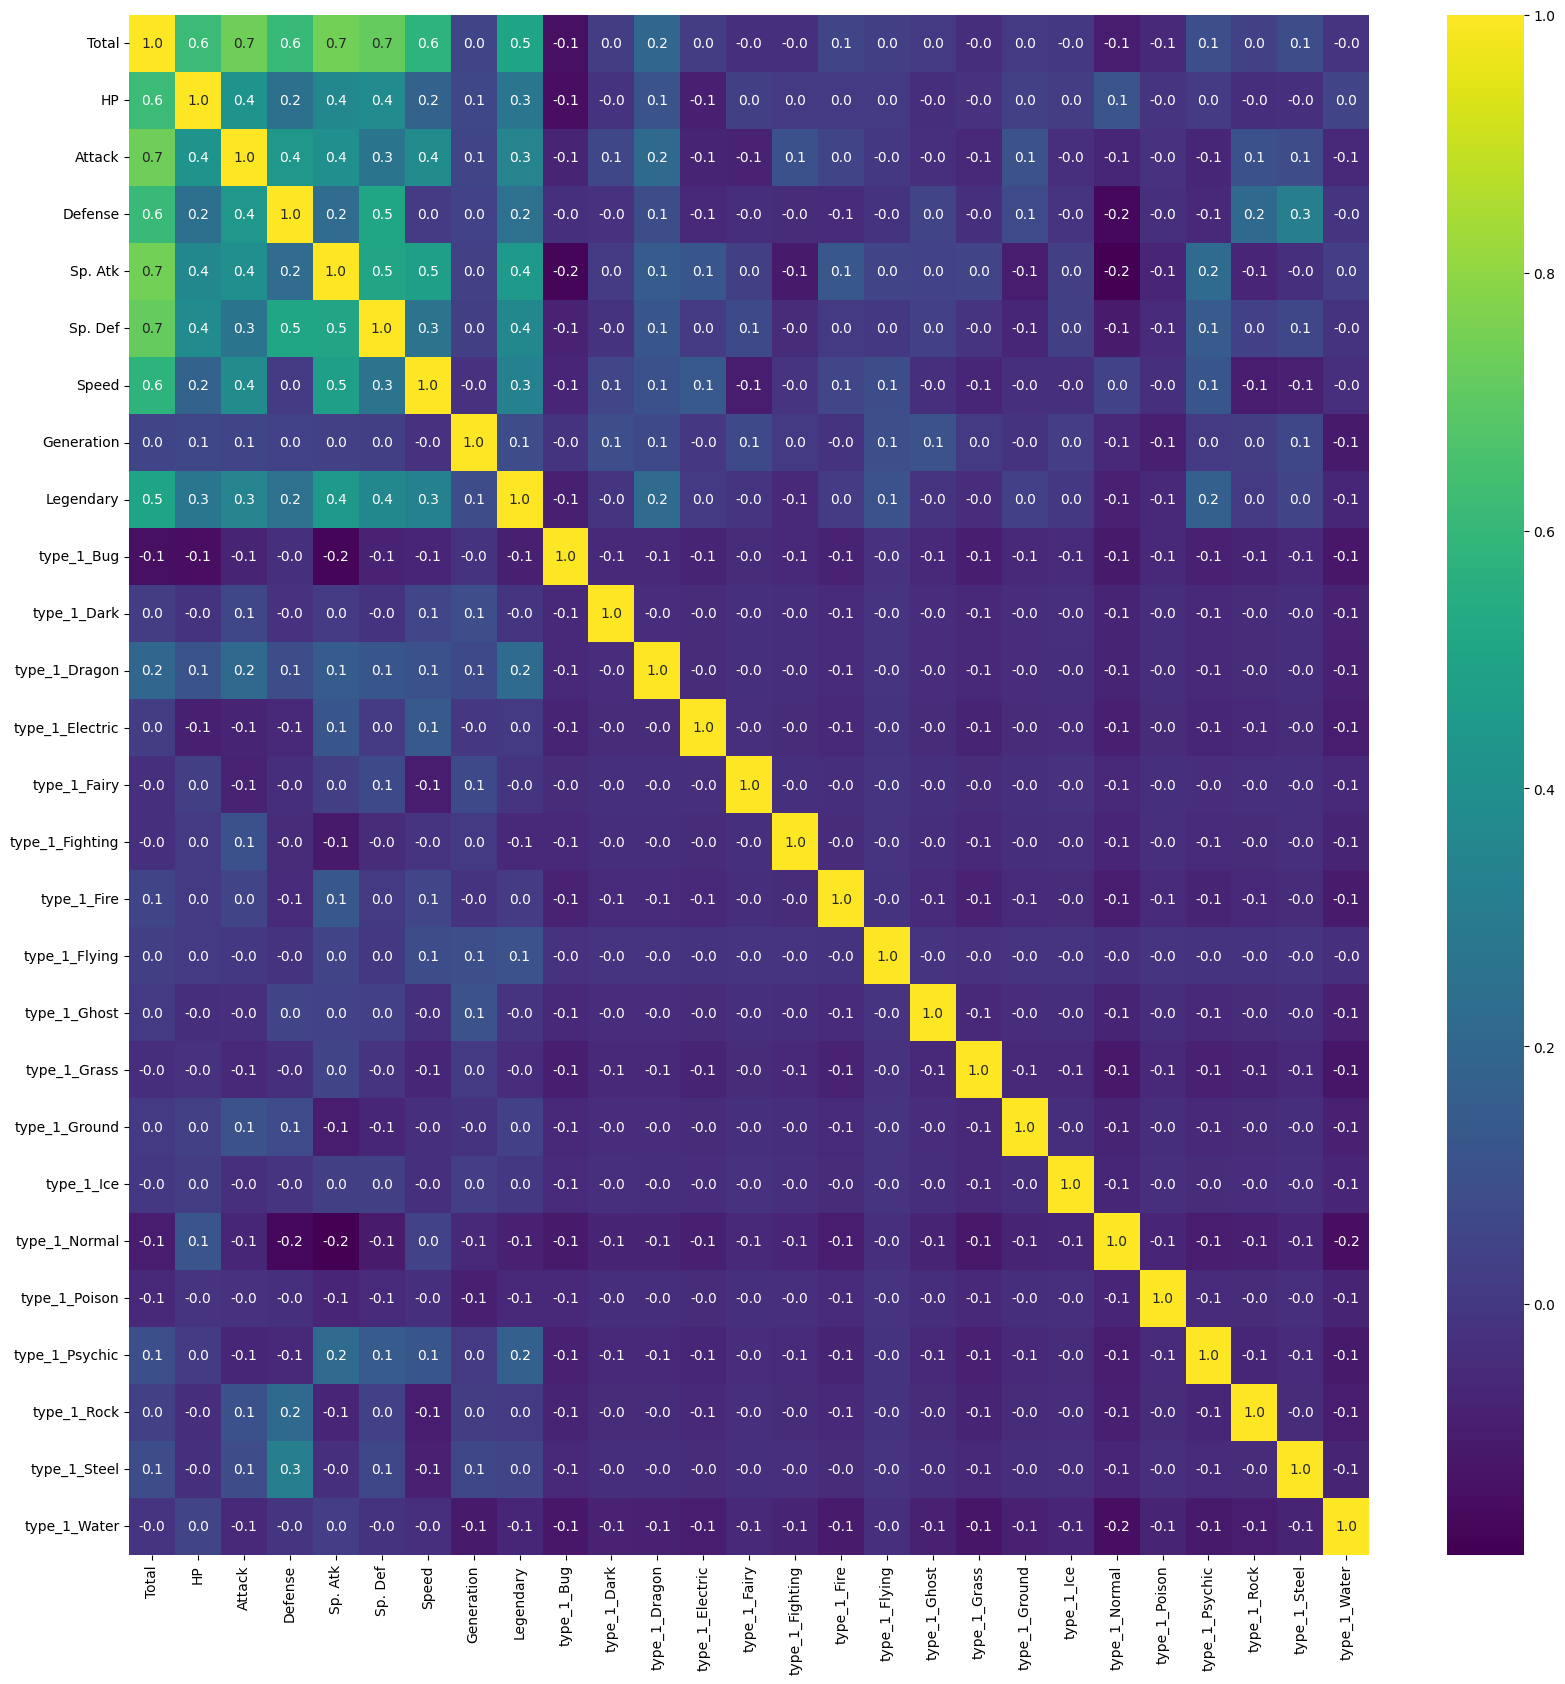

In [131]:
plt.figure(figsize=(20,20))
# Opción 1:
# encoding de la columna Type 1 y usarlas para calcular la correlación
df_numericals = df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

# encoding
type_dummies = pd.get_dummies(df['Type 1'], prefix='type_1')

# juntar todo en un solo dataframe: df_numericals + encoding
df_concat = pd.concat([df_numericals, type_dummies], axis=1)

# calcular correlación
df_corr = df_concat.corr()
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap ='viridis')

<Axes: >

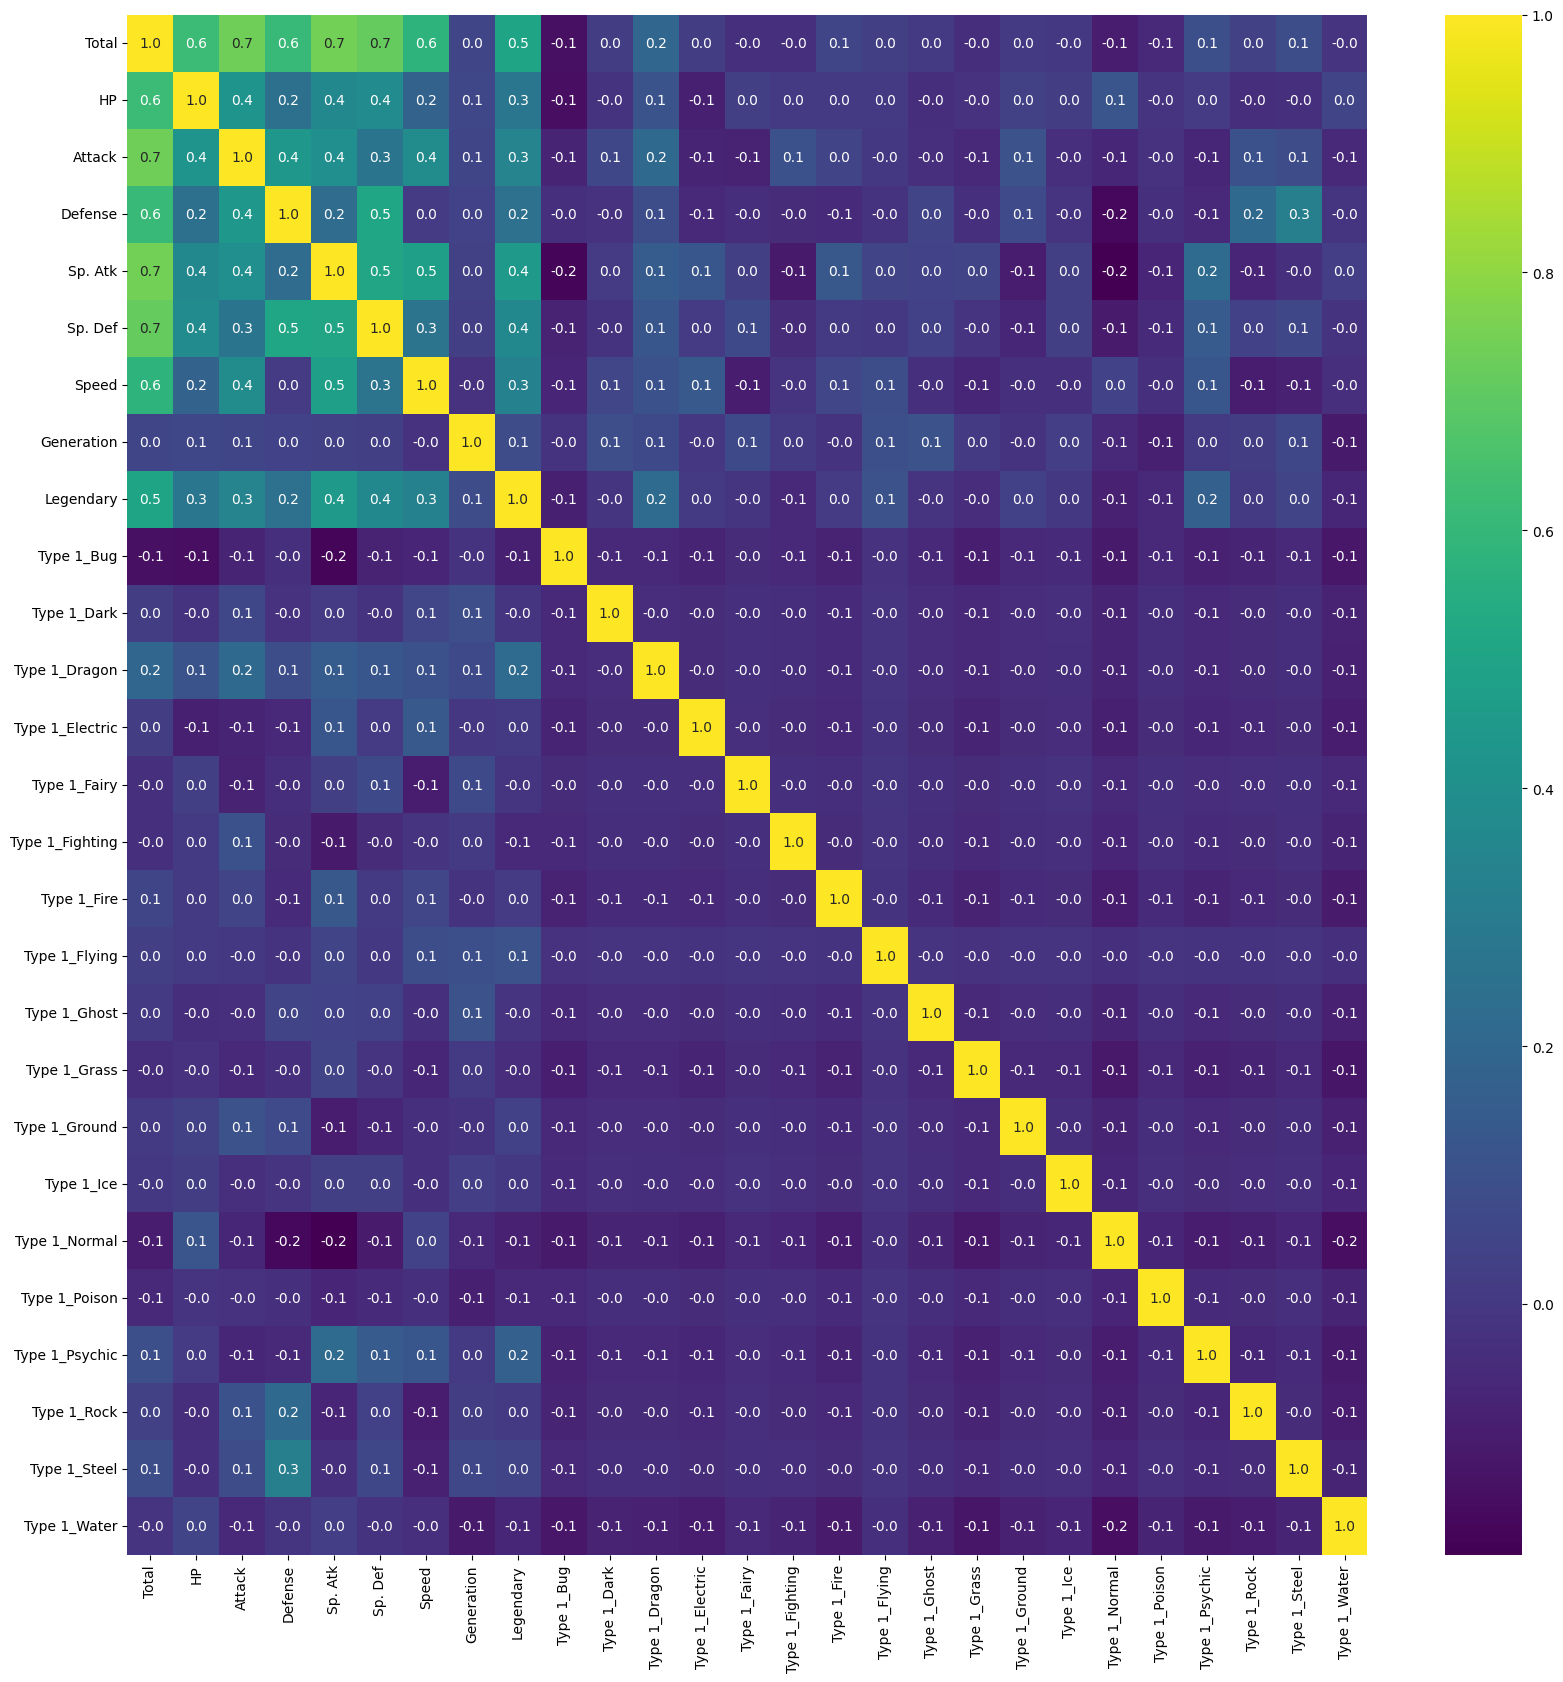

In [126]:
plt.figure(figsize=(20,20))
df_encoded = pd.get_dummies(df, columns=['Type 1'])
cols_corr = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 
             'Generation', 'Legendary'] + [col for col in df_encoded.columns if col.startswith('Type 1_')]
df_corr = df_encoded[cols_corr].corr()
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap ='viridis')

<Axes: >

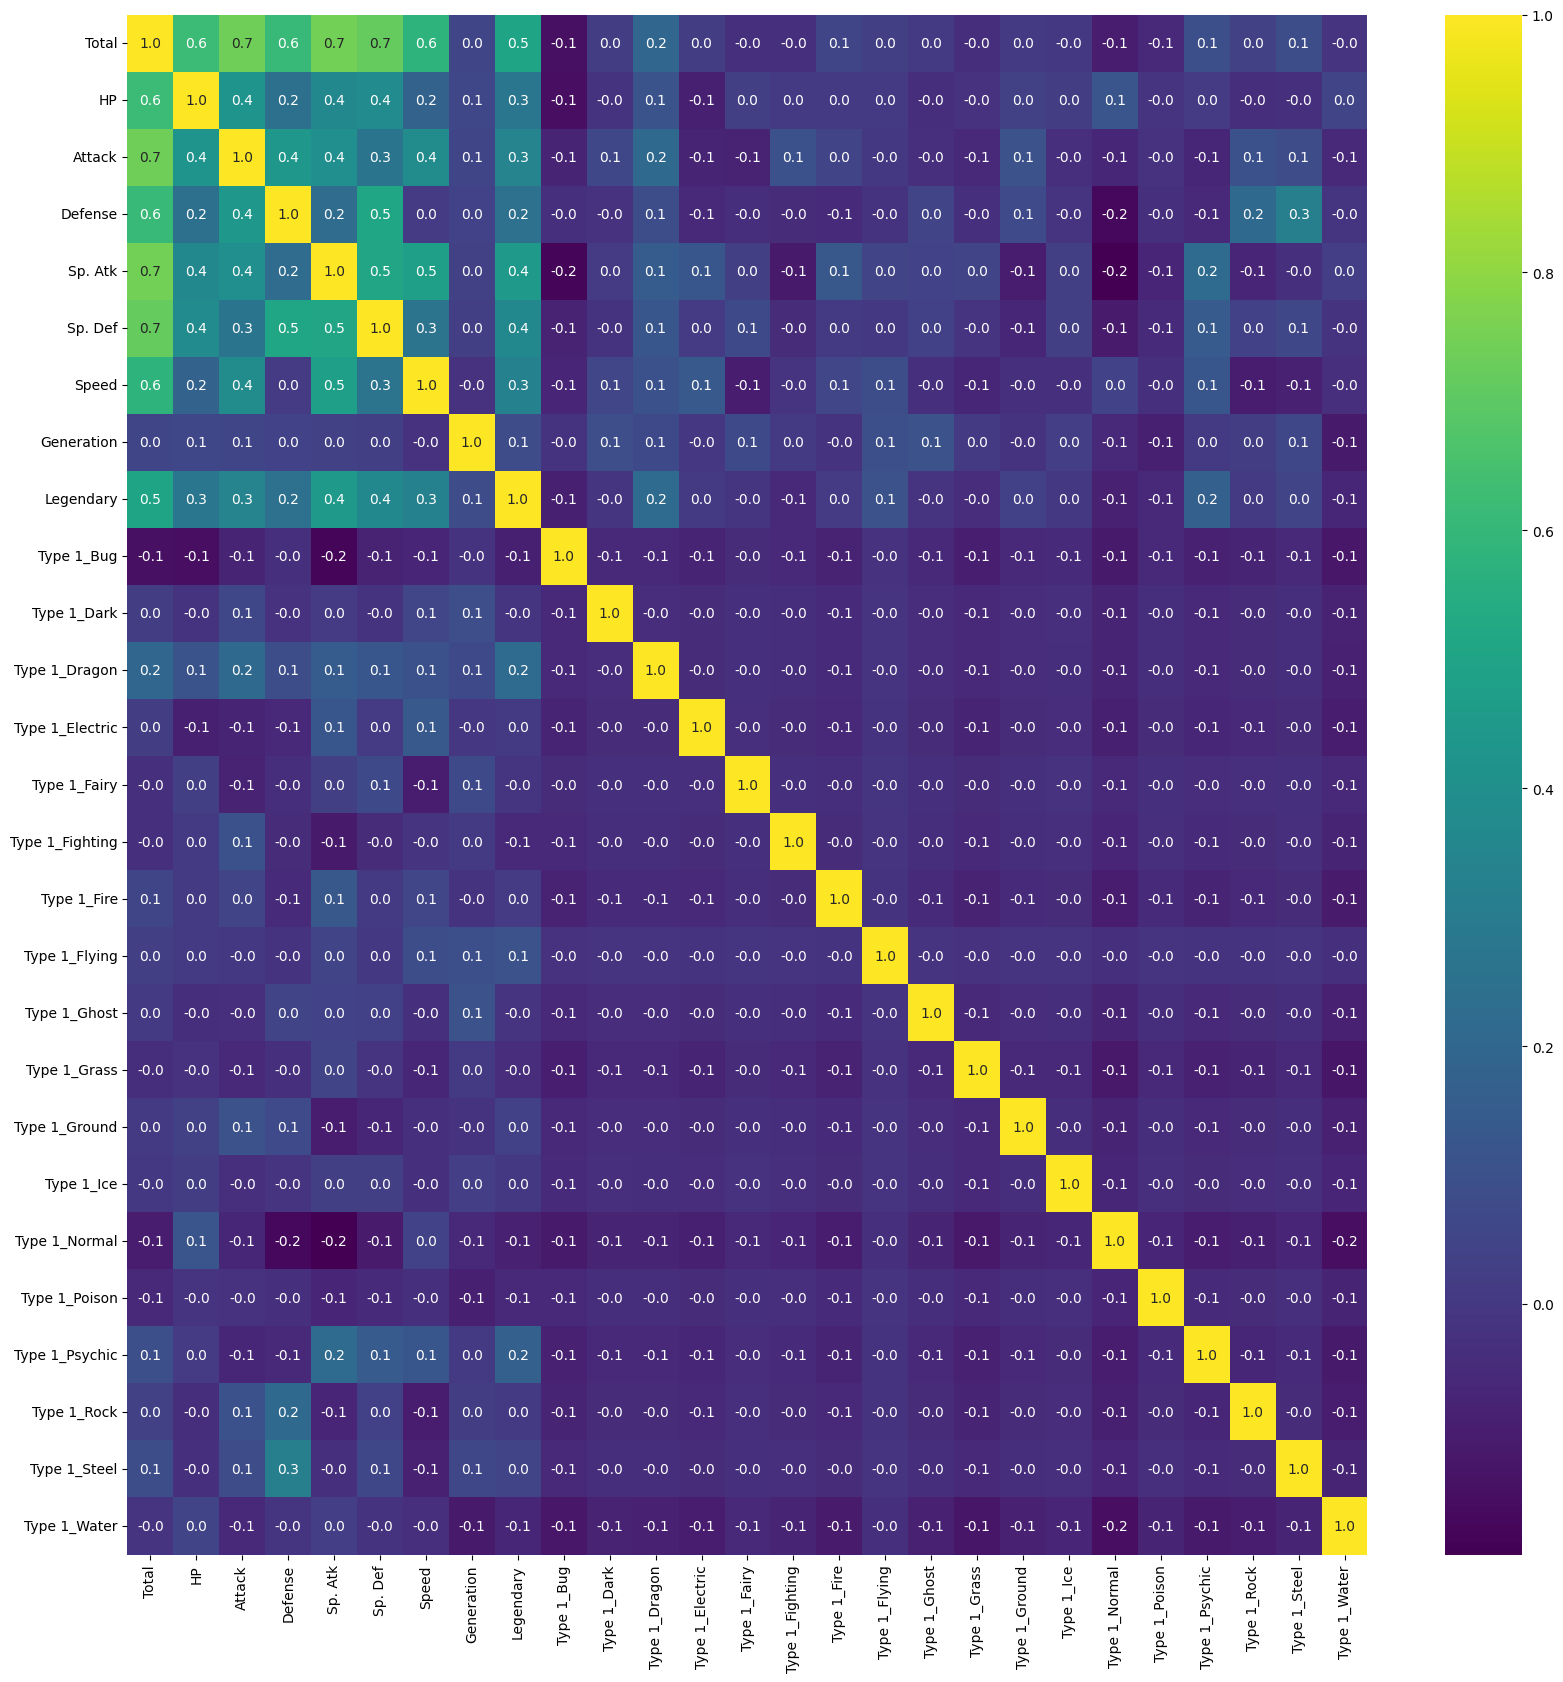

In [136]:
plt.figure(figsize=(20,20))
# Opción 2:

# df.drop y borrar todas menos las que interesen
df_base = df.drop(['#', 'Name', 'Type 2'], axis=1)

# encoding
df_encoded = pd.get_dummies(df_base)

# correlación
df_corr = df_encoded.corr()
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap ='viridis')

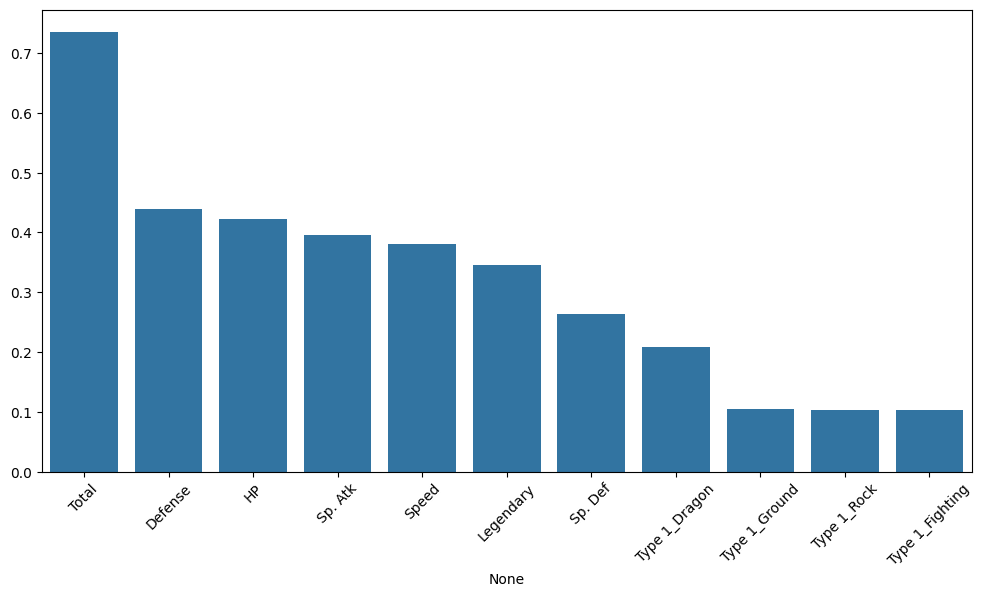

In [148]:

plt.figure(figsize=(12,6))
# Correlación con barras
# útil para ver la correlación para una columna que nos interese
# Supongamos que queremos ver qué es lo que correlaciona con HP o con Attack
correlations = df_encoded.corr()['Attack'].drop('Attack')

# Opcional: Filtrar correlaciones bajas, no las queremos
filtro = (correlations > 0.1) | (correlations < -0.1) 
filtered_correlations = correlations[filtro]
filtered_correlations

# ordenar desc
filtered_correlations.sort_values(ascending=False, inplace=True)

# gráfico de barras
sns.barplot(x=filtered_correlations.index, y=filtered_correlations.values)
plt.xticks(rotation=45);


### Ejercicio 15:
- Encontrar los 5 mejores pokémons con respecto a la columna "Total", del tipo "Electric", "Fire", "Water" y comparar su salud, ataque, defensa y velocidad en un mapa de calor.

### Ejercicio 16:
- Usando FacetGrid obtén un KDE plot del ataque para legendarios y no legendarios.
- Repite lo mismo, ahora separándolos también por generaciones en cada fila.